### **Sine Function Representation**
The sine function is mathematically expressed as:

$$ y(t) = \sin(t) $$

where:
-  t  represents time or the input variable.
-  y(t)  gives the sine of \( t \), oscillating between -1 and 1.

The following plot visualizes the function over the interval $ -2 \pi  $ to $ 2 \pi $.


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/var/folders/n8/19ypk1rs6tdbh7vcb43bfl0c0000gn/T/ipykernel_3031/1667833840.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Plot of $y = \sin(t)$')


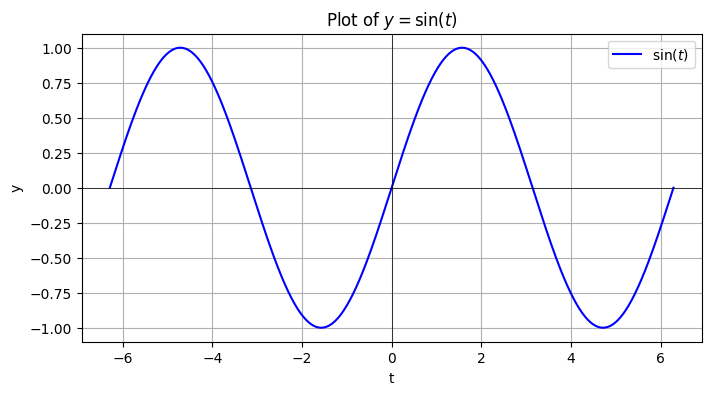

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range
t = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Compute sine function
y = np.sin(t)

# Plot the function
plt.figure(figsize=(8, 4))
plt.plot(t, y, label=r'$\sin(t)$', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Plot of $y = \sin(t)$')
plt.legend()
plt.grid()
plt.show()


### **Sine Wave with Frequency and Angular Frequency**
The sine wave is mathematically expressed as:

$$ y(t) = A \sin( \omega t ) $$

where:
- A  is the amplitude,
- t  represents time,
- $ \omega $ (angular frequency) determines the rate of oscillation,
- f  is the frequency in Hz, related to $ \omega $ by:

$$ \omega = 2 \pi f $$

Increasing  f  or $ \omega $ results in a higher oscillation rate, meaning the wave completes more cycles per second.

The visualization below shows different values of  f to demonstrate their effects.


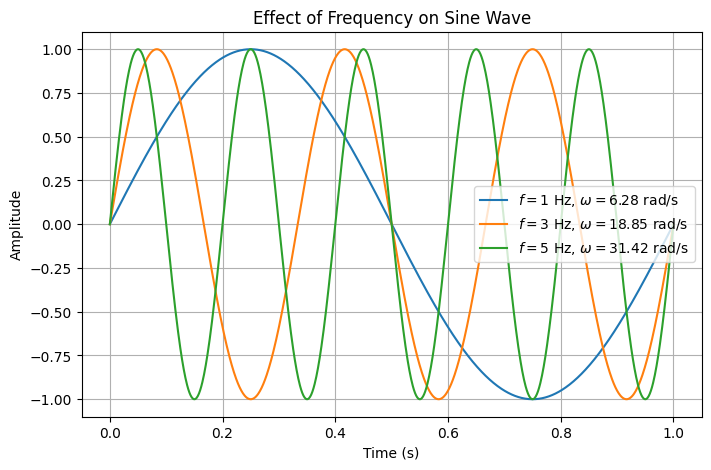

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 1  # Amplitude
t = np.linspace(0, 1, 1000)  # Time from 0 to 1 sec
frequencies = [1, 3, 5]  # Different frequencies in Hz

# Plot sine waves with different frequencies
plt.figure(figsize=(8, 5))

for f in frequencies:
    omega = 2 * np.pi * f  # Angular frequency
    y = A * np.sin(omega * t)  # Compute sine wave
    plt.plot(t, y, label=r'$f = {}$ Hz, $\omega = {}$ rad/s'.format(f, round(omega, 2)))

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Effect of Frequency on Sine Wave')
plt.legend()
plt.grid()
plt.show()


### **Fourier Transform Definition and Sine Wave Derivation**
The **Fourier Transform** of a function $ y(t) $ is given by:

$$ Y(f) = \int_{-\infty}^{\infty} y(t) e^{-j 2\pi f t} dt $$

where:
- $ Y(f) $ represents the frequency domain representation of $ y(t) $,
- $ j $ is the imaginary unit ($ j^2 = -1 $),
- $ f $ is the frequency in Hz.

#### **Fourier Transform of a Sine Wave**
The sine wave in the time domain is given by:

$$ y(t) = \sin( 2\pi f_0 t ) $$

Applying the Fourier Transform:

$$ Y(f) = \int_{-\infty}^{\infty} \sin( 2\pi f_0 t ) e^{-j 2\pi f t} dt $$

Using Euler's identity:

$$ \sin( x ) = \frac{e^{j x} - e^{-j x}}{2j} $$

Rewriting the sine function:

$$ Y(f) = \int_{-\infty}^{\infty} \frac{e^{j 2\pi f_0 t} - e^{-j 2\pi f_0 t}}{2j} e^{-j 2\pi f t} dt $$

Separating the terms:

$$ Y(f) = \frac{1}{2j} \left[ \int_{-\infty}^{\infty} e^{j 2\pi (f_0 - f) t} dt - \int_{-\infty}^{\infty} e^{-j 2\pi (f_0 + f) t} dt \right] $$

Since the integral of an **exponential function** over the entire range results in a **Dirac delta function** $ \delta(x) $, we get:

$$ Y(f) = \frac{1}{2j} \left[ \delta(f - f_0) - \delta(f + f_0) \right] $$

#### **Interpretation**
The Fourier Transform of a sine wave consists of **two impulse functions** located at frequencies $ \pm f_0 $. This means that in the frequency domain, a sine wave is represented by two sharp peaks at $ +f_0 $ and $ -f_0 $, corresponding to its fundamental frequency.

The following visualization plots both **time and frequency domain representations**.


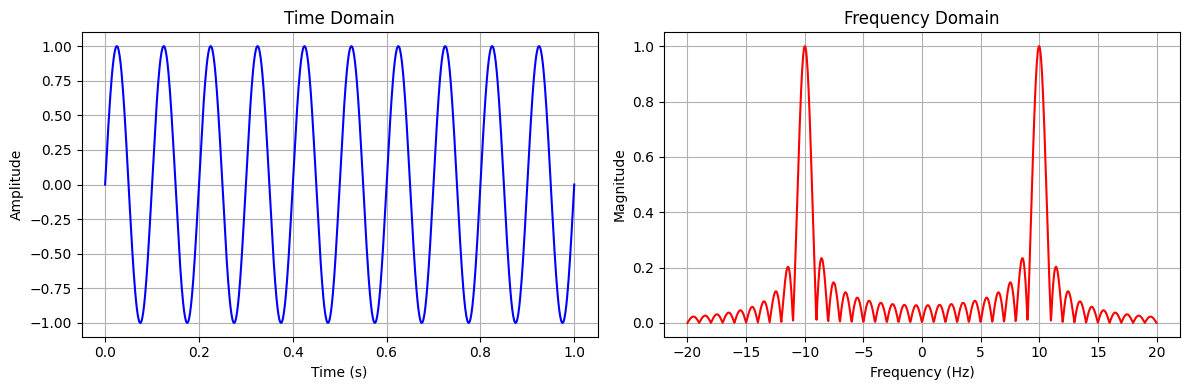

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f0 = 10  # Frequency in Hz
T = 1  # Time duration (sec)
t = np.linspace(0, T, 1000)  # Time domain
y = np.sin(2 * np.pi * f0 * t)  # Sine wave

# Fourier Transform Computation (Manual Integration)
freqs = np.linspace(-20, 20, 1000)  # Frequency domain
Yf = np.zeros(len(freqs), dtype=complex)

for i, f in enumerate(freqs):
    Yf[i] = np.trapezoid(y * np.exp(-2j * np.pi * f * t), t)  # Numerical integration

# Normalize for visualization
Yf_mag = np.abs(Yf) / max(np.abs(Yf))

# Plot Time & Frequency Domain Side-by-Side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Time Domain
axs[0].plot(t, y, color='b')
axs[0].set_title('Time Domain')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid()

# Frequency Domain
axs[1].plot(freqs, Yf_mag, color='r')
axs[1].set_title('Frequency Domain')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].grid()

plt.tight_layout()
plt.show()


### **Fourier Transform Using NumPy's FFT**
To compute the Fourier Transform of a sine wave using a built-in function, we can use **NumPy's FFT algorithm**:

$$ Y(f) = \mathcal{F} \{ y(t) \} $$

where:
- $ \mathcal{F} \{ \cdot \} $ represents the Fourier Transform,
- $ y(t) $ is the sine wave in the time domain.

NumPy provides the function **`np.fft.fft`**, which computes the **Discrete Fourier Transform (DFT)**, and **`np.fft.fftfreq`**, which returns the corresponding frequency bins.

The following visualization compares both **time domain and frequency domain** using **FFT**.


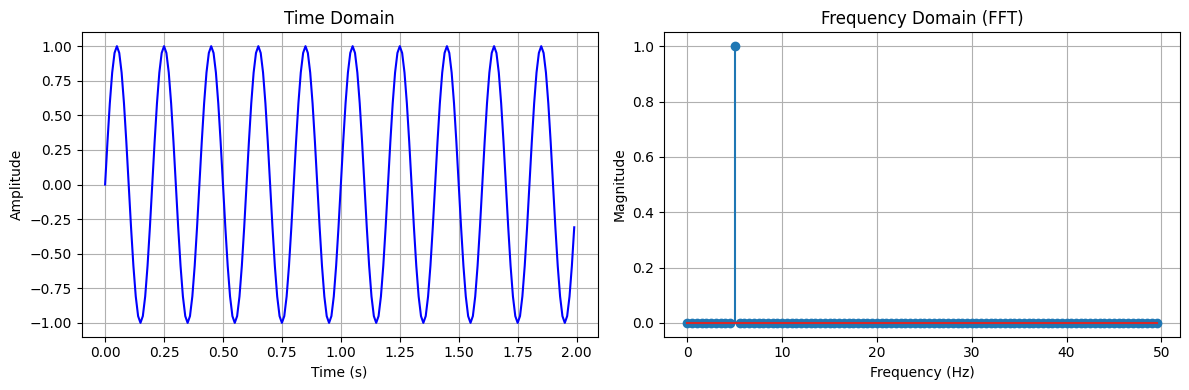

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f0 = 5  # Fundamental frequency
fs = 100  # Sampling frequency (Hz)
T = 2  # Time duration (sec)
t = np.linspace(0, T, fs*T, endpoint=False)  # Time domain
y = np.sin(2 * np.pi * f0 * t)  # Sine wave

# Compute FFT
Yf = np.fft.fft(y)  # Fourier Transform
freqs = np.fft.fftfreq(len(y), 1/fs)  # Frequency bins

# Normalize magnitude
Yf_mag = np.abs(Yf) / max(np.abs(Yf))

# Plot Time & Frequency Domain Side-by-Side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Time Domain
axs[0].plot(t, y, color='b')
axs[0].set_title('Time Domain')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid()

# Frequency Domain
axs[1].stem(freqs[:len(freqs)//2], Yf_mag[:len(freqs)//2])   # Only plot positive frequencies
axs[1].set_title('Frequency Domain (FFT)')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].grid()

plt.tight_layout()
plt.show()


### **Fourier Transform vs. Fast Fourier Transform**
#### **Continuous Fourier Transform (FT)**
The Fourier Transform of a function $ y(t) $ is given by:

$$ Y(f) = \int_{-\infty}^{\infty} y(t) e^{-j 2\pi f t} dt $$

where:
- $ Y(f) $ represents the frequency domain representation of $ y(t) $,
- $ j $ is the imaginary unit ($ j^2 = -1 $),
- $ f $ is the frequency in Hz.

#### **Discrete Fourier Transform (DFT)**
For a **discrete** sequence $ y[n] $, the Discrete Fourier Transform (DFT) is defined as:

$$ Y[k] = \sum_{n=0}^{N-1} y[n] e^{-j \frac{2\pi}{N} k n} $$

where:
- $ N $ is the total number of samples,
- $ k $ represents frequency bins.

#### **Fast Fourier Transform (FFT)**
FFT is simply an **optimized** algorithm for computing the DFT efficiently:

$$ Y[k] = \sum_{n=0}^{N-1} y[n] e^{-j \frac{2\pi}{N} k n} $$

However, FFT reduces computational complexity from **$ O(N^2) $ (DFT) to $ O(N \log N) $**, making it much faster.

### **Key Similarities**
- Both **FT and FFT** aim to transform a time-domain signal into frequency components.
- **FFT is an efficient implementation of DFT**, which approximates FT for sampled signals.
- The fundamental equation remains **the same**, but FFT **minimizes unnecessary computations**.

### **Computational Difference**
The following visualization compares **manual FT computation** and **FFT algorithm** in terms of execution speed.


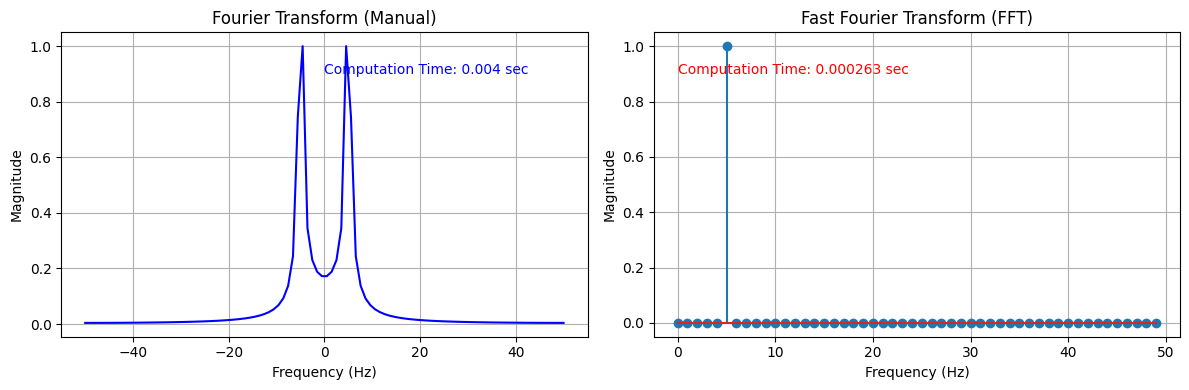

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define parameters
f0 = 5  # Fundamental frequency
fs = 100  # Sampling frequency (Hz)
T = 1  # Time duration (sec)
t = np.linspace(0, T, fs*T, endpoint=False)  # Time domain
y = np.sin(2 * np.pi * f0 * t)  # Sine wave

# ---- Manual Fourier Transform ----
start_ft = time.time()
freqs_manual = np.linspace(-fs//2, fs//2, len(y))  # Frequency domain
Yf_manual = np.zeros(len(freqs_manual), dtype=complex)

for i, f in enumerate(freqs_manual):
    Yf_manual[i] = np.trapezoid(y * np.exp(-2j * np.pi * f * t), t)  # Numerical integration
end_ft = time.time()
ft_time = end_ft - start_ft  # Time taken for FT

# ---- Fast Fourier Transform ----
start_fft = time.time()
Yf_fft = np.fft.fft(y)  # FFT computation
freqs_fft = np.fft.fftfreq(len(y), 1/fs)  # Frequency bins
end_fft = time.time()
fft_time = end_fft - start_fft  # Time taken for FFT

# Normalize magnitude for visualization
Yf_manual_mag = np.abs(Yf_manual) / max(np.abs(Yf_manual))
Yf_fft_mag = np.abs(Yf_fft) / max(np.abs(Yf_fft))

# Plot Computational Difference Side by Side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# FT Computation
axs[0].plot(freqs_manual, Yf_manual_mag, color='b')
axs[0].set_title('Fourier Transform (Manual)')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude')
axs[0].grid()
axs[0].text(0, 0.9, f"Computation Time: {ft_time:.3f} sec", fontsize=10, color='blue')

# FFT Computation
axs[1].stem(freqs_fft[:len(freqs_fft)//2], Yf_fft_mag[:len(freqs_fft)//2])
axs[1].set_title('Fast Fourier Transform (FFT)')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].grid()
axs[1].text(0, 0.9, f"Computation Time: {fft_time:.6f} sec", fontsize=10, color='red')

plt.tight_layout()
plt.show()


# Why FFT is $ O(N\log N) $ Instead of $ O(N^2) $

The Discrete Fourier Transform (DFT) of a sequence of length \(N\) is defined as:
$$
X[k] = \sum_{n=0}^{N-1} x[n]\, e^{-i\frac{2\pi}{N} kn}, \quad k=0,1,\dots,N-1.
$$
A direct computation for each \(k\) requires summing over \(N\) terms, leading to a total of \(N\) sums of \(N\) terms each, i.e., \(O(N^2)\) operations.

The Fast Fourier Transform (FFT) uses a divide-and-conquer strategy to reduce this complexity. It begins by splitting the sum into even and odd indices:
$$
X[k] = \sum_{n=0}^{N/2-1} x[2n]\, e^{-i\frac{2\pi}{N} k(2n)} 
+ \sum_{n=0}^{N/2-1} x[2n+1]\, e^{-i\frac{2\pi}{N} k(2n+1)}.
$$
This can be rewritten as:
$$
X[k] = E[k] + e^{-i\frac{2\pi}{N} k} \, O[k],
$$
where
$$
E[k] = \sum_{n=0}^{N/2-1} x[2n]\, e^{-i\frac{2\pi}{N/2} kn},
$$
$$
O[k] = \sum_{n=0}^{N/2-1} x[2n+1]\, e^{-i\frac{2\pi}{N/2} kn}.
$$

Notice that \(E[k]\) and \(O[k]\) are themselves DFTs of length \(N/2\). Thus, the FFT algorithm recursively computes two DFTs of size \(N/2\) and then combines them with \(O(N)\) extra work per recursion level. This gives rise to the recursive relation:
$$
T(N) = 2T\left(\frac{N}{2}\right) + O(N).
$$

According to the Master Theorem, the solution to this recurrence is:
$$
T(N) = O(N\log N).
$$

Thus, while the naive method computes $ N \times N $ operations, the FFT's clever reuse of partial computations reduces the total effort to $ O(N\log N) $.

---

*Intuition:*  
Even though each output $ X[k] $ seemingly involves a sum of $ N $ terms, the FFT algorithm leverages the symmetry and periodicity in the complex exponentials, breaking the problem down recursively. Each stage reduces the size of the DFT by half, and there are $ \log_2 N $ such stages, with each stage performing $ O(N) $ operations. This explains the $ O(N\log N) $ complexity.


---------------
---------------
--------------
--------------

### **Discrete Inverse Fourier Transform vs. Inverse FFT**

#### **Inverse Fourier Transform Definition**
The **Inverse Fourier Transform** reconstructs a time-domain signal from its frequency-domain representation:

$$ y(t) = \int_{-\infty}^{\infty} Y(f) e^{j 2\pi f t} df $$

where:
- $ Y(f) $ represents the signal in the **frequency domain**.
- $ y(t) $ is the signal in the **time domain**.
- $ j $ is the imaginary unit ($ j^2 = -1 $).

#### **Discrete Inverse Fourier Transform (IDFT)**
The **Discrete Inverse Fourier Transform (IDFT)** reconstructs a discrete signal from its frequency components:

$$ y[n] = \frac{1}{N} \sum_{k=0}^{N-1} Y[k] e^{j \frac{2\pi}{N} k n} $$

where:
- $ Y[k] $ represents the **frequency domain** values.
- $ N $ is the total number of samples.
- $ n $ represents the time index.

#### **Inverse Fast Fourier Transform (IFFT)**
The **IFFT** efficiently computes the IDFT using an optimized algorithm:

$$ y[n] = \mathcal{F}^{-1} \{ Y[k] \} $$

where:
- $ \mathcal{F}^{-1} $ represents the **IFFT function**, which reduces complexity to **$ O(N \log N) $**, unlike IDFT’s **$ O(N^2) $**.

### **Comparison**
We will:
1. Compute **IDFT manually**.
2. Compute **IFFT using NumPy**.
3. Compare their execution times graphically.


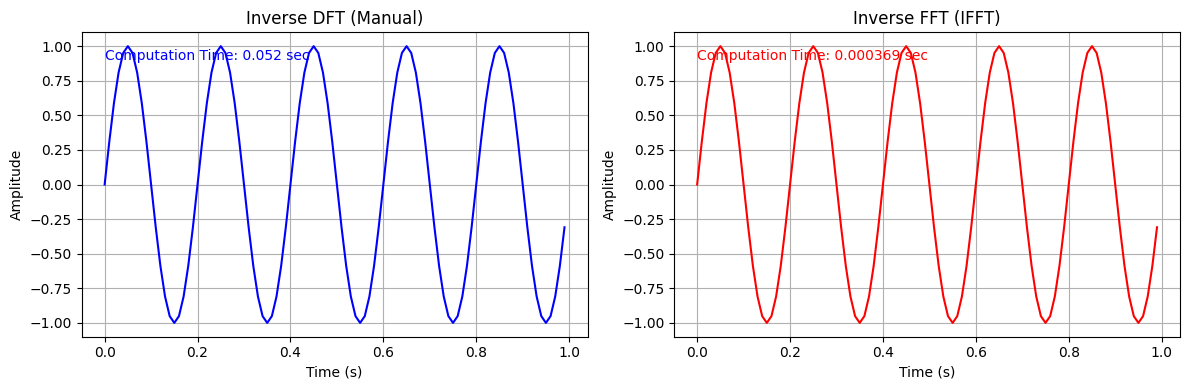

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define parameters
N = 100  # Number of samples
f0 = 5  # Fundamental frequency
fs = 100  # Sampling frequency
T = 1  # Time duration
t = np.linspace(0, T, N, endpoint=False)  # Time domain
y_original = np.sin(2 * np.pi * f0 * t)  # Original sine wave

# ---- Compute FFT ----
Yf_fft = np.fft.fft(y_original)  # Frequency domain representation

# ---- Manual IDFT Computation ----
start_idft = time.time()
y_manual = np.zeros(N, dtype=complex)

j = 1j  # Imaginary unit

for n in range(N):
    for k in range(N):
        y_manual[n] += Yf_fft[k] * np.exp(j * 2 * np.pi * k * n / N)
    y_manual[n] /= N  # Normalize
end_idft = time.time()
idft_time = end_idft - start_idft  # Time taken for IDFT

# ---- Compute IFFT ----
start_ifft = time.time()
y_ifft = np.fft.ifft(Yf_fft)  # Inverse FFT computation
end_ifft = time.time()
ifft_time = end_ifft - start_ifft  # Time taken for IFFT

# Plot Computational Difference Side by Side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# IDFT Computation
axs[0].plot(t, y_manual.real, color='b')
axs[0].set_title('Inverse DFT (Manual)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid()
axs[0].text(0, 0.9, f"Computation Time: {idft_time:.3f} sec", fontsize=10, color='blue')

# IFFT Computation
axs[1].plot(t, y_ifft.real, color='r')
axs[1].set_title('Inverse FFT (IFFT)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
axs[1].text(0, 0.9, f"Computation Time: {ifft_time:.6f} sec", fontsize=10, color='red')

plt.tight_layout()
plt.show()
